In [66]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer

# 1. Create a quantum circuit with 2 qubits and 2 classical bits
**cx** is a controlled-X gate, which is a **CNOT gate**. It **flips** the second qubit if the first qubit is **|1>**.
**controler** qubit is the first qubit, and the **target** qubit is the second qubit.

**barrier** is a visual aid to separate the operations in the circuit. It also acts as a directive for circuit compilation to separate pieces of a circuit so that any optimizations or re-writes are constrained to only act between barriers.

In [64]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

# 2. Simulate the circuit with the qasm simulator

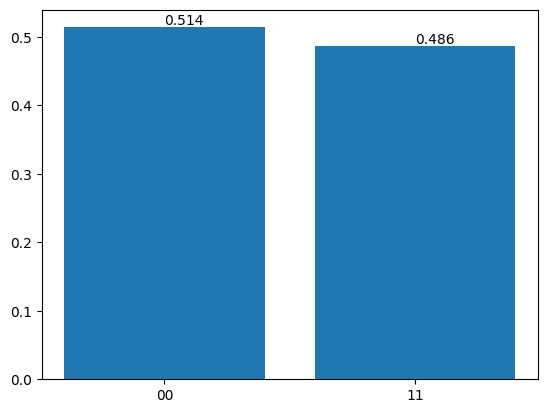

In [65]:
backend = Aer.get_backend('qasm_simulator')

n_shots = 500

job = backend.run(circuit, shots=n_shots)
result = job.result()
counts = result.get_counts()

d_zero = counts['00'] / n_shots
d_one = counts['11'] / n_shots

bars = plt.bar(['00', '11'], [d_zero, d_one])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom')